# CLASSIFICATION Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM CBB3**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

### Problem Statement

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### Data overview
Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

# Team Supervisor
- Chris Barnett

# TEAM CBB3 MEMBERS
- 1. Elelwani Tshikovhi (Team Leader);
- 2. Katlego Maponya (Team coordinator) ;
- 3. Musa Mashaba ;
- 4. Zwothandwa Kunene ;
- 5. Sinethemba Nongqoto;
- 6. Desree Maleka


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Engineering</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|  |

---

# Import all the  **libraries**

In [49]:
# Data analysis and wrangling libraries
import pandas as pd
import numpy as np
# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
import time
import collections
from collections import Counter

# Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Metrics for Model Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Downloads
#nltk.download('all')
#nltk.download('stopwords')
%matplotlib inline


### Download NLTK Corpora
Some of the `nltk` text processing methods introduced in this train involve a lookup operation. For example, to find all [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) in a given string of text, we require a list of all possible stopwords in the English language to use for the lookup. Such a list is refered to as a [corpus](https://en.wikipedia.org/wiki/Text_corpus). Therefore, we need to first download the corpora we're going use, otherwise we may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections. Not to worry, as we can easily avoid these errors by downloading the [corpora](http://www.nltk.org/nltk_data/) using the `nltk` downloader tool:

In [50]:
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

pip intall comet version control

In [52]:
!pip3 install comet_ml

In [53]:
# Import comet_ml at the top 
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",
    workspace="elelwani-tshikovhi",
)

# Run your code and go to /

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/691b94a07a3d43d7896180cd34516d02
COMET INFO:   Uploads:
COMET INFO:     conda-info          : 1
COMET INFO:     conda-specification : 1
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: Comet has disabled auto-logging functionality as

*   [Trello Link](https://trello.com/b/2KvEPRJi/advanced-classificatin-team-cbb3-week-1)
*   [Link to comet](https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/view/new/panels)
*   [Link to Github](https://github.com/TEAMCBB3Classificationpredict)
*   [Link to streamlit]( http://34.244.129.101:5000)
*   [link to presentation](https://docs.google.com/presentation/d/19E1pbrp_lXfBG3FyOsz43QQRqq-qd7eGtp00w7nESCs/edit#slide=id.p)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

The training and testing data, trains_set and test_set respectively are loaded as Pandas DataFrames

In [135]:
# Load train data
train = pd.read_csv('https://raw.githubusercontent.com/TEAMCBB3Classificationpredict/datasets/main/train.csv')

# Load test data
test = pd.read_csv('https://raw.githubusercontent.com/TEAMCBB3Classificationpredict/datasets/main/test_with_no_labels.csv')

In [55]:
train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables uusing  descriptive statistics and data visualisations

---


### Shape of Dataframe

In [56]:
print('Train shape : rows, columns:',train.shape)
print('Train shape : rows, columns:',test.shape)

Train shape : rows, columns: (15819, 3)
Train shape : rows, columns: (10546, 2)


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


### Get Statistical Info of all features

In [38]:
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


### Check for nulls

In [39]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [40]:
# Create class distribution dataframe
sentiment_counts = train.groupby('sentiment').size().reset_index(name='counts')
sentiment_counts


,sentiment,counts
0,-1,1296
1,0,2353
2,1,8530
3,2,3640


### Histogram and density plot

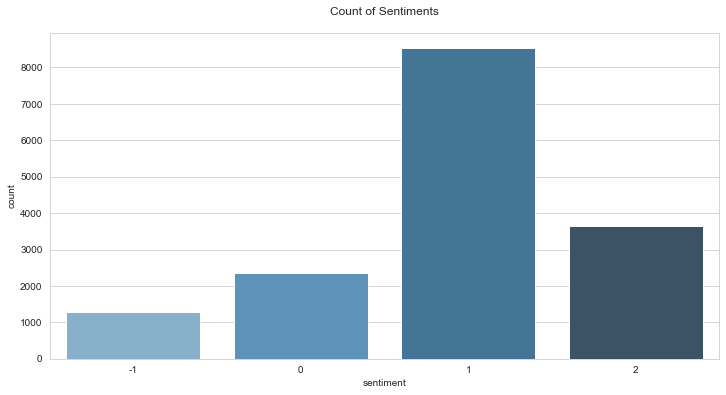

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train, palette="Blues_d")
plt.title('Count of Sentiments\n')
plt.show()

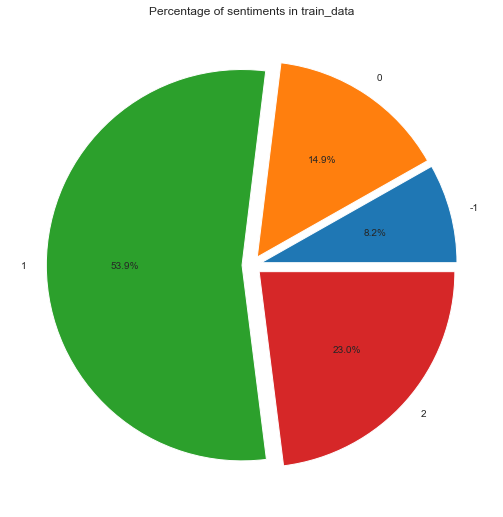

In [103]:
senti = train.groupby('sentiment', as_index=False).count()
fig = plt.subplots(figsize=(14,9))
plt.pie(senti['message'], labels = senti['sentiment'].astype('str'), autopct='%1.1f%%', explode = [0.05, 0.05, 0.05, 0.05])
plt.title('Percentage of sentiments in train_data')
plt.show()

<Figure size 1440x1080 with 0 Axes>

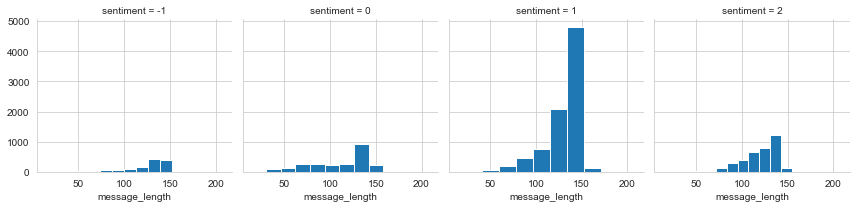

In [44]:
#Plot the distribution of the tweet length per class using a histogram.
plt.figure(figsize=(20,15))
train['message_length'] = train['message'].apply(len)
g = sns.FacetGrid(train,col='sentiment')
g.map(plt.hist,'message_length') 
plt.show()

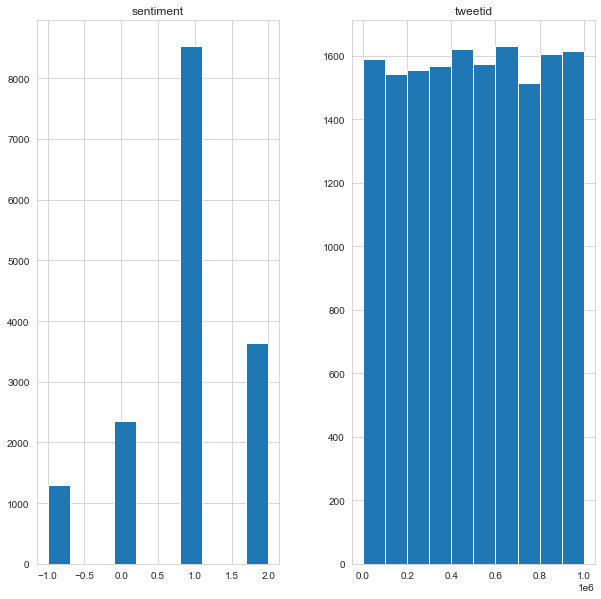

In [46]:
features = ['sentiment', 'tweetid']
train[features].hist(figsize=(10,10));

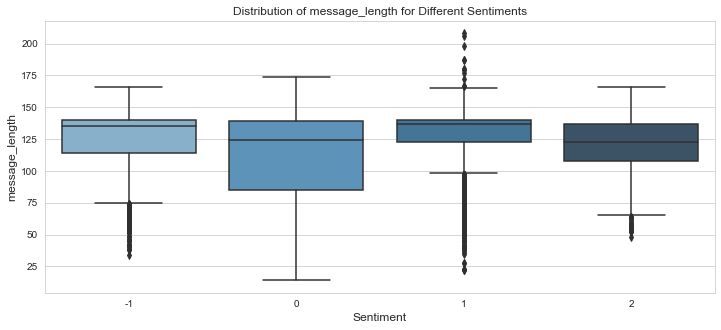

In [48]:
fig,axis = plt.subplots(figsize=(12,5)) 
sns.boxplot(x='sentiment',y='message_length',data=train,palette=("Blues_d")) 
plt.title('Distribution of message_length for Different Sentiments', fontsize = 12) 
plt.xlabel('Sentiment', fontsize = 12) 
plt.ylabel('message_length', fontsize = 12) 
plt.show()

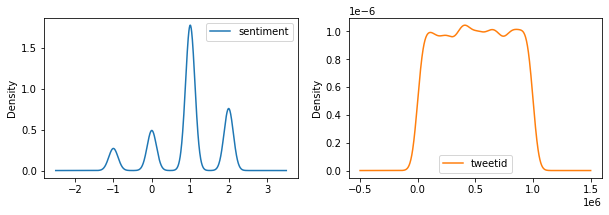

In [14]:
train[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

### Box and Violin plot


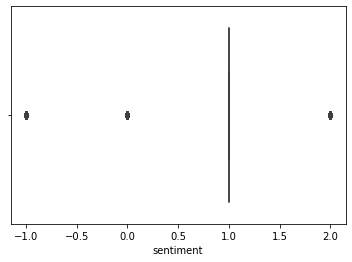

In [15]:
sns.boxplot(x='sentiment', data=train);


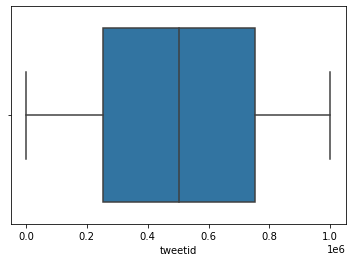

In [16]:
sns.boxplot(x='tweetid', data=train);

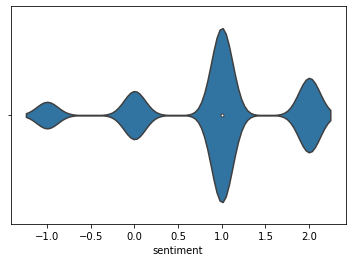

In [17]:
sns.violinplot(x='sentiment', data=train);


<AxesSubplot:>

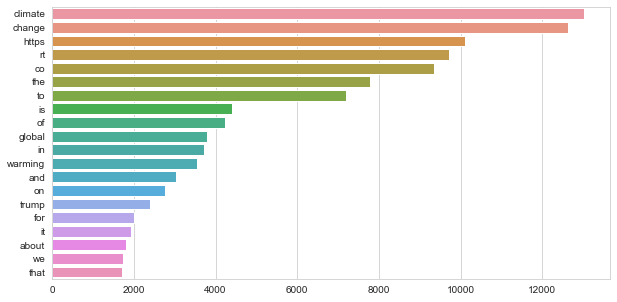

In [136]:
# Visualize current state of data
# Function returns a unigram
def top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range = (1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_unigram = top_tweet_unigrams(train['message'])[:20]
x,y = map(list,zip(*top_tweet_unigram))
sns.barplot(x=y, y=x)

<AxesSubplot:>

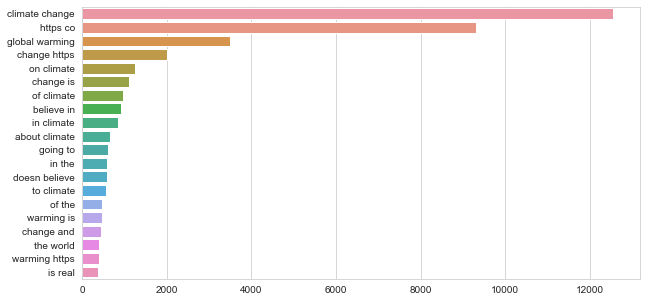

In [137]:
# Function returns a bigram
def top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_bigram = top_tweet_bigrams(train['message'])[:20]
x,y=map(list,zip(*top_tweet_bigram))
sns.barplot(x=y,y=x)

### Non graphical multivariate analysis

In [19]:
train.corr()

,sentiment,tweetid
sentiment,1.000000,-0.003758
tweetid,-0.003758,1.000000


### Multivariate analysis: Graphical


#### Heatmap

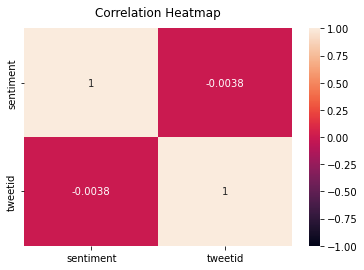

In [20]:
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Pair Plot

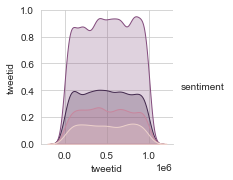

In [21]:
sns.set_style("whitegrid");
sns.pairplot(train, hue="sentiment");
plt.show();

for the test data

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


<a id="four"></a>
## 4. Data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
|  clean the dataset, and possibly create new features -using Natural language process . |

In [158]:
df = train.copy()

# **Tweets Data Preprocessing and Cleaning** 
The preprocessing of the text data is an essential step as it makes the raw text ready for modelling , we remove  noisy and inconsistent data

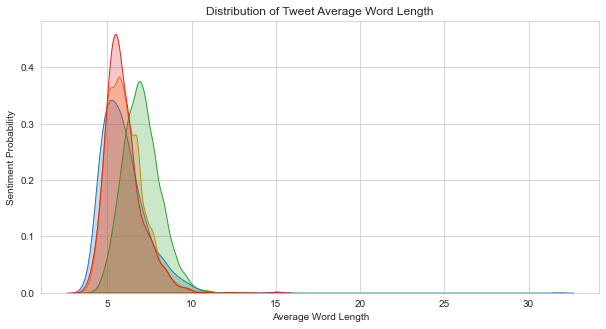

In [159]:
#Function to find average word length 
def average_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

# Broadcast to text column
df['average_word_length'] = df['message'].apply(average_word_length)

# Split so we can use updated train set with new feature
df = df[:len(df)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

# Create graphs
sns.kdeplot(df['average_word_length'][df['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(df['average_word_length'][df['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(df['average_word_length'][df['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(df['average_word_length'][df['sentiment'] == -1], shade = True, label = 'Anti')

# Set title
plt.title('Distribution of Tweet Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Sentiment Probability')

# Plot graphs
plt.show()

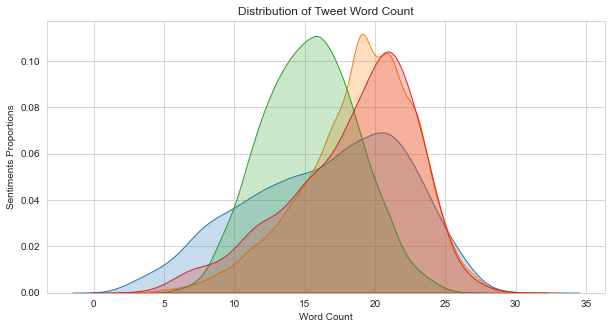

In [160]:
# Column for the number of words in tweet
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Split so we can use updated train set with new feature
df = df[:len(df)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(df['word_count'][df['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(df['word_count'][df['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(df['word_count'][df['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(df['word_count'][df['sentiment'] == -1], shade = True, label = 'Anti')

# Set title and plot
plt.title('Distribution of Tweet Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiments Proportions')
plt.show()

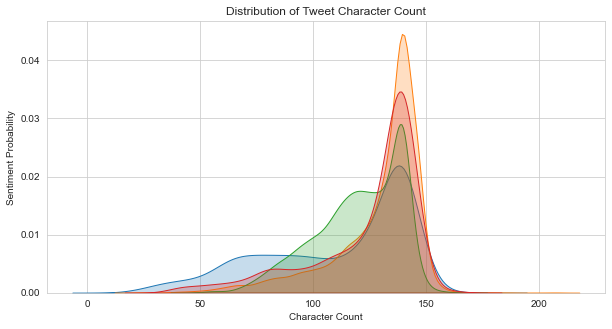

In [161]:
# Column for the number of characters in a tweet
df['character_count'] = df['message'].apply(lambda x: len(x))

# Split so we can use updated train set with new feature
df = df[:len(df)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

# Create graphs
sns.kdeplot(df['character_count'][df['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(df['character_count'][df['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(df['character_count'][df['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(df['character_count'][df['sentiment'] == -1], shade = True, label = 'Anti')


# Set title and plot
plt.title('Distribution of Tweet Character Count')
plt.xlabel('Character Count')
plt.ylabel('Sentiment Probability')
plt.show()

In [162]:
# convert text into numbers
def sentiment(df):
    """
    This function converts the classes from
    numbers into words

    Input:
    dataframe: original tweets
    datatype: Dataframe

    output:Dataframe
    datatype: dataframe

    """
    sentiment = df['sentiment']
    sentiment_class = []
    for i in sentiment:
        if i == 1:
            sentiment_class.append('Pro')
        elif i == 0:
            sentiment_class.append('Neutral')
        elif i == -1:
            sentiment_class.append('Anti')
        else:
            sentiment_class.append('News')

    df['sentiment'] = sentiment_class
    return df
df = sentiment(df)
df.head(10)

,sentiment,message,tweetid,character_count,average_word_length,word_count
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140,6.421053,19
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62,5.300000,10
2,News,RT @RawStory: Researchers say we have three ye...,698562,140,6.421053,19
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,5.666667,15
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,5.833333,18
5,Pro,Worth a read whether you do or don't believe i...,425577,110,6.928571,14
6,Pro,RT @thenation: Mike Pence doesn’t believe in g...,294933,119,6.500000,16
7,Pro,RT @makeandmendlife: Six big things we can ALL...,992717,152,5.652174,23
8,Pro,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,139,4.600000,25
9,Pro,RT @paigetweedy: no offense… but like… how do ...,260471,88,4.933333,15


In [163]:
# Extract the hashtags from the tweets
def extract_hashtags(df):
    """
    This function extracts hashtags from tweets
    and stores the hashtags on a new column

    Input: train Dataframe
    datatype: dataframe
    output: new column with hastag column
    """
    df['hashtags'] = df['message'].str.findall(r'#.*?(?=\s|$)')
    df['hashtags'].apply(lambda x: np.nan if len(x) == 0 else [x.lower() for x in x])
    return df
extract_hashtags(df)


,sentiment,message,tweetid,character_count,average_word_length,word_count,hashtags
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140,6.421053,19,[]
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62,5.300000,10,[]
2,News,RT @RawStory: Researchers say we have three ye...,698562,140,6.421053,19,[]
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,5.666667,15,[#TodayinMaker#]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,5.833333,18,[#ElectionNight]
...,...,...,...,...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001,140,5.409091,22,[]
15815,News,RT @washingtonpost: How climate change could b...,17856,119,8.230769,13,[]
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133,6.052632,19,[]
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732,128,5.142857,21,[#Agenda2030.]


In [164]:
pip install demoji

Note: you may need to restart the kernel to use updated packages.


In [165]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [166]:
import emoji


In [167]:
def extract_emojis(s):
    """
    Function checks if a single codepoint is an emoji codepoint
    by checking if it is contained in emoji.UNICODE_EMOJI.
    """
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)
    

In [168]:
df['emoji'] = df['message'].apply(extract_emojis)
df[df['emoji']!='']['emoji']

Series([], Name: emoji, dtype: object)

C:\Users\f5468981\AppData\Local\Temp/ipykernel_22424/623351887.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = sentiment_class


,sentiment,message,tweetid,average_word_length,hashtags,emoji,Num_words_text
0,Pro,polyscimajor epa chief doesnt think carbon dio...,625221,6.421053,[],,19
1,Pro,its not like lack evidence anthropogenic globa...,126103,5.300000,[],,10
2,News,rawstory researchers say have three years act ...,698562,6.421053,[],,19
3,Pro,todayinmaker wired was pivotal year the war cl...,573736,5.666667,[#TodayinMaker#],,15
4,Pro,soynoviodetodas its and racist sexist climate ...,466954,5.833333,[#ElectionNight],,18
5,Pro,worth read whether you dont believe climate ch...,425577,6.928571,[],,14
6,Pro,thenation mike pence doesn’t believe global wa...,294933,6.500000,[],,16
7,Pro,makeandmendlife six big things can all today f...,992717,5.652174,[],,23
8,Pro,aceofspadeshq 8yo nephew inconsolable wants di...,664510,4.600000,[],,25
9,Pro,paigetweedy offense… but like… how you just no...,260471,4.933333,[],,15


In [128]:
# Check duplicate messages in the training data
dupl_train = df['message']
dupl_train = df[dupl_train.isin(dupl_train[dupl_train.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the training data and to see that each message is unique
dupl_tweet_id = df['tweetid']
df[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# Check for duplicate messages in the testing data
dupl_test = test['message']
dupl_test = test[dupl_test.isin(dupl_test[dupl_test.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the testing data and to see that each message is unique
dupl_tweet_id = test['tweetid']
test[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# View percentage of duplicates in our datasests
dupl_train_prop = (len(dupl_train)/len(df['message']))*100
dupl_test_prop = (len(dupl_test)/len(test['message']))*100
print('Train data percentange of Retweets:',str(round((dupl_train_prop),3))+"%")
print('Test data percentage of Retweets:',str(round((dupl_test_prop),3))+"%")

Train data percentange of Retweets: 16.331%
Test data percentage of Retweets: 11.037%


In [129]:
dupl_test.head(7)

,message,tweetid
5094,How can people be so ignorant when it comes to...,618984
9691,How can people be so ignorant when it comes to...,353129
960,Obamas fiddled global warming data: *Shameless...,818493
4866,Obamas fiddled global warming data: *Shameless...,122281
3341,RT @1followernodad: ok a climate change denier...,543287
4978,RT @1followernodad: ok a climate change denier...,176463
9601,RT @1followernodad: ok a climate change denier...,345248


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sentiment            15819 non-null  int64  
 1   message              15819 non-null  object 
 2   tweetid              15819 non-null  int64  
 3   average_word_length  15819 non-null  float64
 4   word_count           15819 non-null  int64  
 5   character_count      15819 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 741.6+ KB


## Step 2: Text pre-processing

Machine learning algorithms take numbers as inputs, not text, which means that we need to convert the texts into numerical vectors. We proceed as follows:

### 1. Tokenization

It consists in dividing the texts into words or smaller sub-texts, allowing us to determine the “vocabulary” of the dataset (set of unique tokens present in the data). Usually we use word-level representation. For our exemple we will use NLTK Tokenizer()

### 2. Word indexing:

Construct a vocablary_index mapper based on word frequency: the index would be inversely proportional to the word occurrence frequency in the overall dataset. the most frequent world would have index=1.. And every single word would get a unique index.

These two steps are factorized as follows:

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, create one or more regression models that are able to accurately predict the Sentiment. |

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---